In [1]:
import sys
sys.path.append('../src')

from module.module import Linear
from module.activation import TanH, Softmax

from loss.loss import CrossEntropie, CELogSoftmax
from networks.optim import Optim
from networks.sequentiel import Sequentiel

from utils.generation import generate_linear_data, generate_data_gauss
from utils.plots import plot_net
from utils.evaluation import accuracy
from utils.processing import one_hot_y

import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt

In [2]:
data = pkl.load(open("../data/usps.pkl",'rb')) 

In [3]:
X = data["X_train"]
y = data["Y_train"]

X_test = data["X_test"]
y_test = data["Y_test"]

In [4]:
classes = len(np.unique(y))

input_neurons = X.shape[1]
output_neurons = classes

In [5]:
y_one_hot = one_hot_y(y, classes)

100%|██████████| 50/50 [00:05<00:00,  8.88it/s]


Training completed.


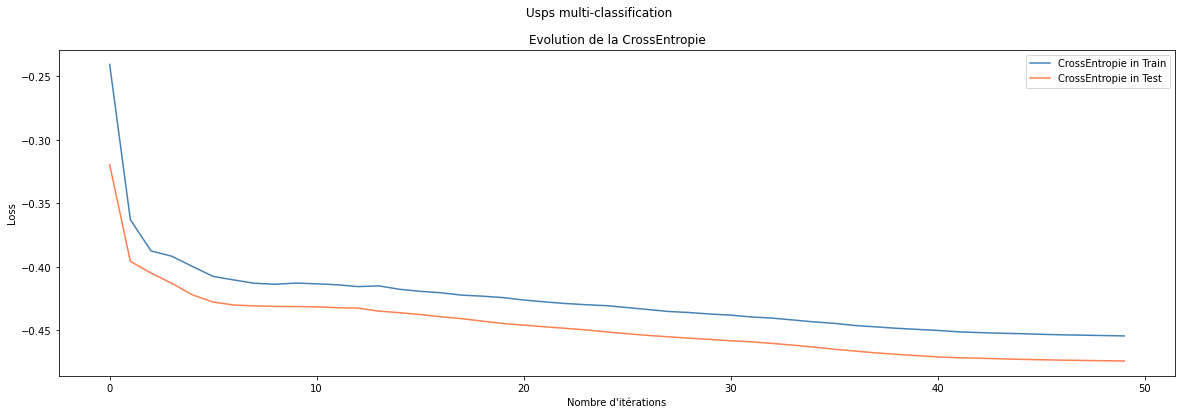

Accuracy : 0.44802867383512546


In [6]:
hidden_neurons_1 = 100
hidden_neurons_2 = 80

net = Sequentiel([
    Linear(input_neurons, hidden_neurons_1, bias=True),
    TanH(),
    Linear(hidden_neurons_1, hidden_neurons_2, bias=True),
    TanH(),
    Linear(hidden_neurons_2, output_neurons, bias=True),
    Softmax()
], classes_type="multi")

optim = Optim(net, CrossEntropie(), eps=1e-3)
optim.SGD(X, y_one_hot, test_train_split=True, batch_size=50, epochs=50, verbose=False)

plot_net(X, y_one_hot, net, optim.train_loss, test_loss=optim.test_loss, net_type="multiclass", net_title="Usps multi-classification", loss_name="CrossEntropie")
print("Accuracy :", accuracy(net, X_test, y_test))

100%|██████████| 50/50 [00:07<00:00,  6.84it/s]


Training completed.


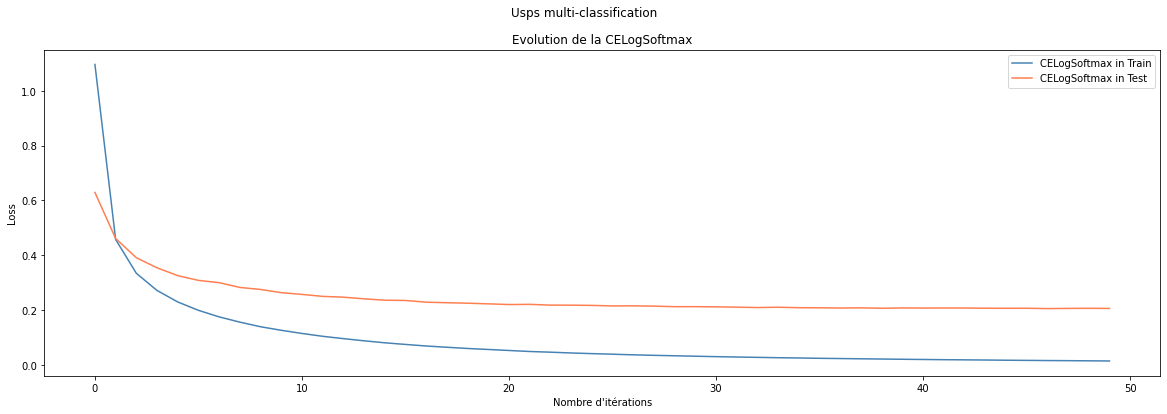

Accuracy : 0.9341805148256761


In [7]:
hidden_neurons_1 = 100
hidden_neurons_2 = 80

net = Sequentiel([
    Linear(input_neurons, hidden_neurons_1, bias=True),
    TanH(),
    Linear(hidden_neurons_1, hidden_neurons_2, bias=True),
    TanH(),
    Linear(hidden_neurons_2, output_neurons, bias=True),
], classes_type="multi")

optim = Optim(net, CELogSoftmax(), eps=1e-3)
optim.SGD(X, y_one_hot, test_train_split=True, batch_size=50, epochs=50, verbose=False)

plot_net(X, y_one_hot, net, optim.train_loss, test_loss=optim.test_loss, net_type="multiclass", net_title="Usps multi-classification", loss_name="CELogSoftmax")
print("Accuracy :", accuracy(net, X_test, y_test))

100%|██████████| 50/50 [00:06<00:00,  7.30it/s]


Training completed.


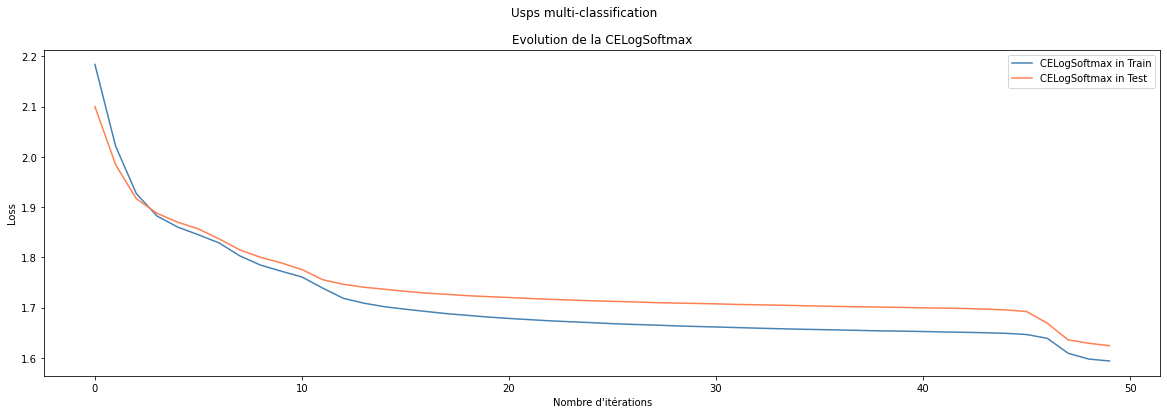

Accuracy : 0.8478331704138156


In [8]:
hidden_neurons_1 = 100
hidden_neurons_2 = 80

net = Sequentiel([
    Linear(input_neurons, hidden_neurons_1, bias=True),
    TanH(),
    Linear(hidden_neurons_1, hidden_neurons_2, bias=True),
    TanH(),
    Linear(hidden_neurons_2, output_neurons, bias=True),
    Softmax()
], classes_type="multi")

optim = Optim(net, CELogSoftmax(), eps=1e-3)
optim.SGD(X, y_one_hot, test_train_split=True, batch_size=50, epochs=50, verbose=False)

plot_net(X, y_one_hot, net, optim.train_loss, test_loss=optim.test_loss, net_type="multiclass", net_title="Usps multi-classification", loss_name="CELogSoftmax")
print("Accuracy :", accuracy(net, X_test, y_test))